### M4 T02 Exercicis 2 i 3

Presento les 2 exercicis junts perque al 3er exercici es fa servir la base de dades al segon

In [354]:
import pandas as pd
import numpy as np

In [355]:
# Fem un DataFrame a partir de l'arxiu movies.txt. 
# Com que l'arxiu no te nom de les columnes, els hi afegim a l'hora de llegir-ho.

movies = pd.read_csv("movies.txt", sep='::', names=["num_prov", "nom_prov", "genere_prov"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [356]:
# comprobem que el DataFrame es correcte
movies.head()

,num_prov,nom_prov,genere_prov
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [357]:
# A la columna genere tenim un llistat de generes aplicables a cada pelicula seprats per '|'
# Dividim aquesta columna en 2, el primer genere llistat ('genere principal')
# i la resta de generes ('resta_generes')
movies = movies.join(movies['genere_prov'].str.split('|', 1, expand=True).rename(columns={0:'genere', 1:'resta_genere'}))

In [358]:
movies.head()

,num_prov,nom_prov,genere_prov,genere,resta_genere
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,Drama
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None


In [359]:
# Extraiem l'any per que la seva posció es fixe
movies["any"] = movies["nom_prov"].str.slice(-5,-1)

In [360]:
# i netegem el títol eliminant l'any, també aprofitant que les posicions son fixes
movies["nom"] = movies["nom_prov"].str.slice(0,-7)

In [361]:
movies.head()

,num_prov,nom_prov,genere_prov,genere,resta_genere,any,nom
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's|Comedy,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's|Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,Drama,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None,1995,Father of the Bride Part II


In [362]:
# Eliminen les columnes innecessaries
movies = movies.drop(['genere_prov', 'resta_genere', 'nom_prov', 'num_prov'], axis=1)

# Ho reordenem
movies = movies[['nom', 'any', 'genere']]

movies

,nom,any,genere
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


### M4 T02 Exercici3

In [363]:
# importem les llibreries per gràfics
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
# Una primera idea es fer un pie chart i un bar chart per genere
# Generem una DataFrame amb el compte de pelicules per genere
# i les ordenem per valor.

genere_count = movies.value_counts(subset=['genere'], sort=True)
genere_count.head()


genere   
Drama        1176
Comedy       1024
Action        503
Horror        262
Adventure     155
dtype: int64

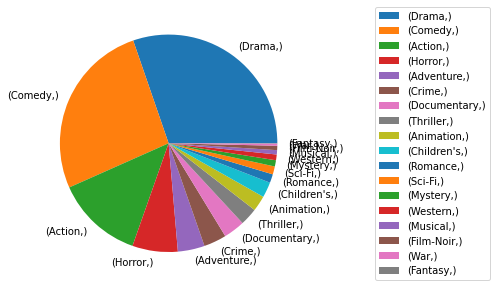

In [367]:
# PIE CHART
# Es un bon tipus de gràfic per una sola variable.
# Permet mortrar les frecuencies relatives de la variable
# Aqui ha estat important ordenar les dades perque permet diferenciar els generes mes comuns. 
# Per contra. els generes menys comuns surten agrupats a un sector a la dreta del plot

genere_count.plot(kind='pie', y='genere',figsize=(15,5), ylabel ='')
plt.legend(loc='right', bbox_to_anchor=(1.3, 0, 0.4, 1));



<AxesSubplot:xlabel='genere', ylabel='Num pelicules'>

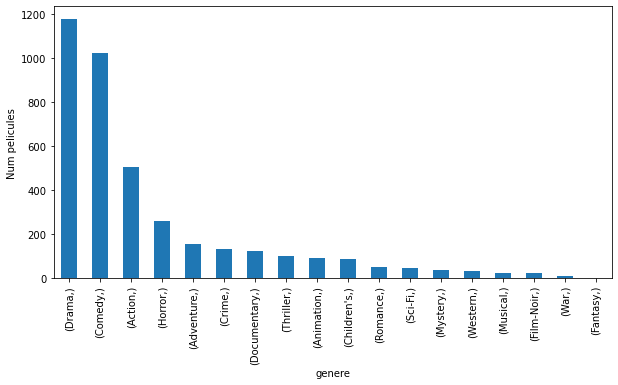

In [368]:
# BAR CHART
# Grafic interessant perque permet veure els valors del numero de pelicules per genere
genere_count.plot(kind='bar', y='genere', legend = '',figsize=(10,5), ylabel = 'Num pelicules')


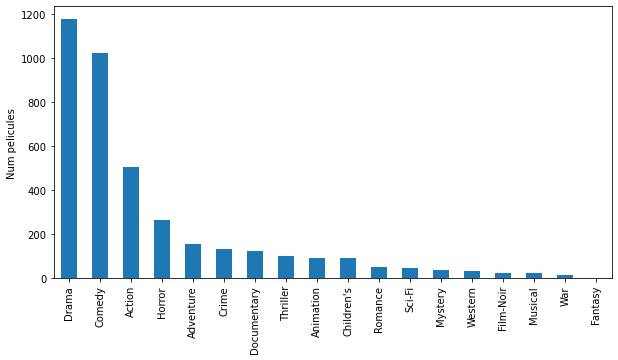

In [369]:
# El grafic de barres ho podem fer mes senzill directament del DataFrame 'movies'

plt.figure(figsize=(10,5))
movies['genere'].value_counts().plot(kind='bar', ylabel = 'Num pelicules');

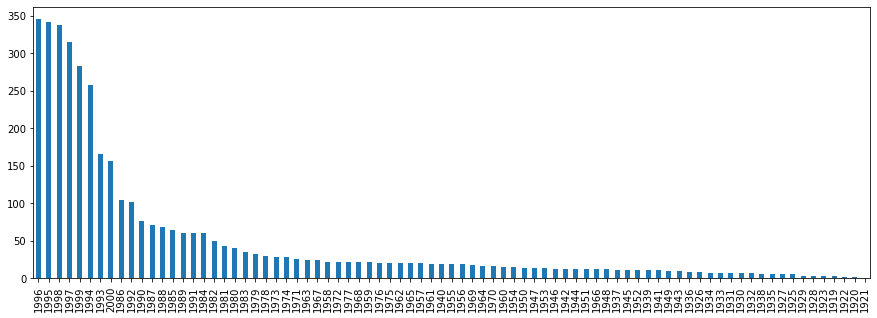

In [370]:
# Veiem per anys

plt.figure(figsize=(10,5))
movies['any'].value_counts(sort = True).plot(kind='bar',figsize = (15,5));

# Problema: ordena les columnes pels valors, no pel nom de la columna

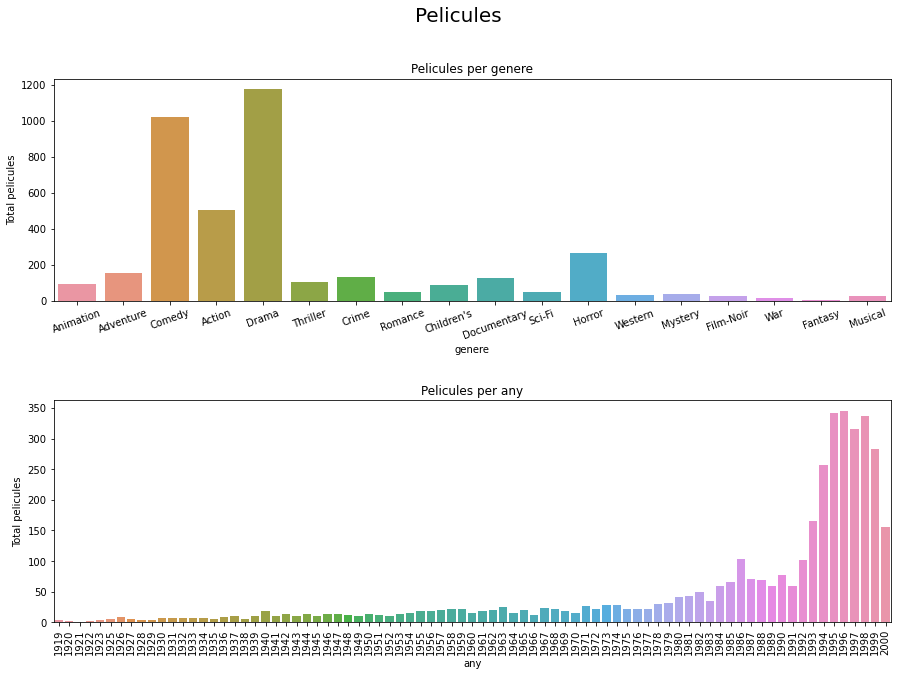

In [374]:
# Ho farem fent servir seaborn.
# Reciclo codi de l'exercici anterior i l'adapto al nou DataFrame:

plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.45)
plt.suptitle("Pelicules", size = 20)

plt.subplot(2,1,1)
sns.countplot(x = 'genere', data = movies)
plt.xticks(rotation = 20)
plt.ylabel('Total pelicules')
plt.title('Pelicules per genere')

plt.subplot(2,1,2)
sns.countplot(x = 'any', data = movies.sort_values('any',ascending=True))
plt.xticks(rotation = 90)
plt.ylabel('Total pelicules')
plt.title('Pelicules per any');

# Ara si que ordena les columnes per l'any, no pel valor del numero de películes !!!

In [303]:
# Fora interessant fer un Treemap plot.
# La imformació es semblant a un Pie chart, però mostre el numero de pelicules com la part proporcional d'un rectangle
# La ventatge es que, en general, la gent te una mala percepció del tamny pels angles
# i per contra te més capacitat de evaluar tamny per la superfície
# Cal importar un altre llibreria: squarify
import squarify    # pip install squarify (algorithm for treemap)


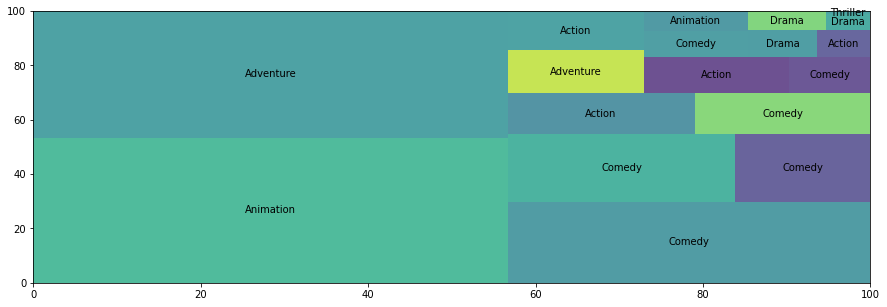

In [349]:
# Fem el plot:
plt.figure(figsize=(15,5))
squarify.plot(sizes=movies['genere'].value_counts(),  alpha=.8, label = movies['genere']);

# El grafic ha sortit força be, però les etiquetes no estan ben posades

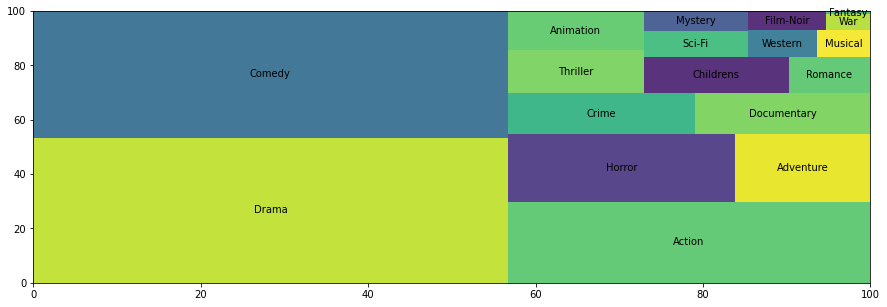

In [348]:
# Torno a fer el plot, posant el nom de les etiquetes per ordre de tamany

plt.figure(figsize=(15,5))
squarify.plot(sizes=movies['genere'].value_counts(), alpha=.9, label = ['Drama','Comedy','Action','Horror','Adventure','Crime','Documentary','Thriller','Animation','Childrens','Romance','Sci-Fi','Mystery','Western','Musical','Film-Noir','War','Fantasy']);

#Ara si que ha sortit el que s'esperava!